In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17254668280257446400
]


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

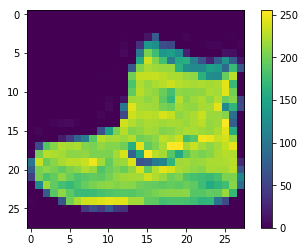

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

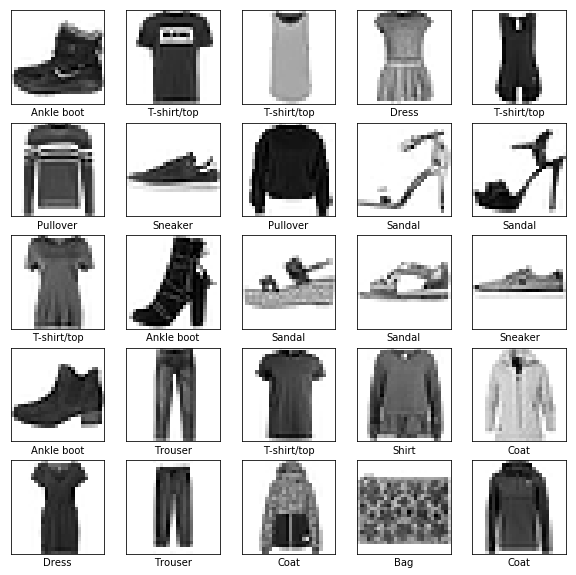

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [1]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'keras' is not defined

In [72]:
model.fit(train_images.reshape([-1, 28, 28, 1]), train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 102s 2ms/step - loss: 0.4370 - acc: 0.8451
Epoch 2/5
60000/60000 [==============================] - 216s 4ms/step - loss: 0.3093 - acc: 0.8867
Epoch 3/5
60000/60000 [==============================] - 240s 4ms/step - loss: 0.2697 - acc: 0.8998
Epoch 4/5
60000/60000 [==============================] - 222s 4ms/step - loss: 0.2405 - acc: 0.9116
Epoch 5/5
60000/60000 [==============================] - 185s 3ms/step - loss: 0.2187 - acc: 0.9185


In [76]:
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 7s 669us/step
Test accuracy: 0.9081


In [78]:
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))
predictions[0]
np.argmax(predictions[0])
for x in predictions[0]:
    print(format(float(x),'.8f'))

0.00000000
0.00000000
0.00000000
0.00000000
0.00000000
0.00000300
0.00000000
0.00003719
0.00000003
0.99995983


In [ ]:
e = 4
q = np.zeros(e*e).reshape(-1, e)
print(q)

j = np.arange(1, e + 1).reshape(-1, 1)
q += j 
print(q)

j = np.arange(1, e + 1) / 10
q += j
print(q)

q = q.reshape(4, 2, 2)
print(q)

In [ ]:
j = np.arange(1, e+1).reshape(-1, 1)
print(j)
j = np.arange(1, e + 1) / 10
print(j)

In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

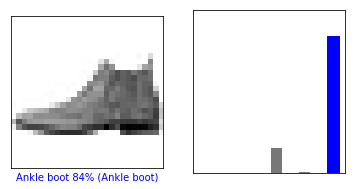

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

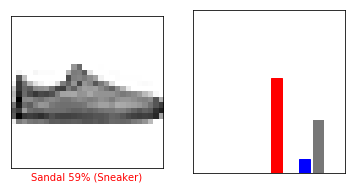

In [16]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

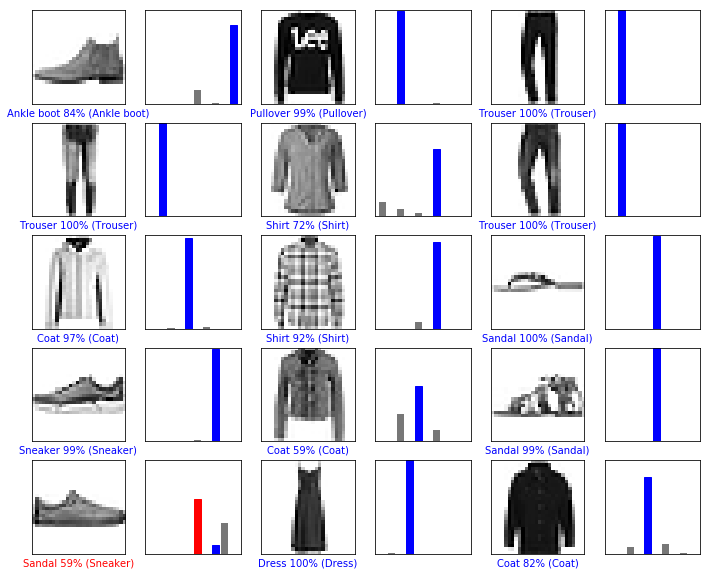

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [18]:
# Add the image to a batch where it's the only member.
img = test_images[0]

img = (np.expand_dims(img,0))

predictions_single = model.predict(img)

print(predictions_single)

[[3.5013986e-06 5.9702508e-08 2.4698426e-07 2.3255708e-08 3.6080723e-06
  1.5282679e-01 8.0603621e-07 8.0507984e-03 3.7241836e-05 8.3907694e-01]]


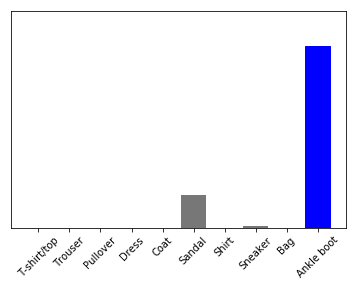

In [19]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)